In [77]:
import numpy as np
import pandas as pd
import pprint 
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
# input
DATASET_PATH = 'D:/root/GeekBrains/ds2/course_project/course_project_train.csv'

# output
PREP_DATASET_PATH = 'D:/root/GeekBrains/ds2/course_project/course_train_mine.csv'

In [79]:
df = pd.read_csv(DATASET_PATH)
df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [80]:
df.shape

(7500, 17)

In [81]:
# Видим, что датасет содержит 17 колонок со свойствами объектов (всего 7500 объектов). 
# Из них 4 свойства типа object, осталные - численные. Нужно проверить объектные типы на содержимое + численные на действительную 
# принадлежность к численным. Проверить все на отсутствующие значения.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [82]:
df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [83]:
df.iloc[10]

Home Ownership                       Home Mortgage
Annual Income                                  NaN
Years in current job                      < 1 year
Tax Liens                                        0
Number of Open Accounts                          7
Years of Credit History                       11.5
Maximum Open Credit                         256322
Number of Credit Problems                        0
Months since last delinquent                   NaN
Bankruptcies                                     0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                         220858
Current Credit Balance                      187492
Monthly Debt                                 14592
Credit Score                                   NaN
Credit Default                                   0
Name: 10, dtype: object

Интересно, что признак Years in current job содержит категориальную переменную. Ее впоследствии нужно разбить на отделные колонки-признаки. 

In [84]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

Теперь посмотрим на содержимое всех признаков типа object:

In [85]:
for colname in df.select_dtypes(include='object').columns:
    print(str(colname) + '\n\n' + str(df[colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

Что-то мне подсказывает, что Have Mortgage - это то же самое, что и Home Mortgage, все одно - ипотека... Значит, надо исправить.

In [86]:
for i in range(len(df)):
    for j in range(len(df.columns)):
        if df.iloc[i, j]=='Have Mortgage':
            df.iloc[i, j] = 'Home Mortgage'

Проверка:

In [87]:
l = df['Home Ownership']=='Have Mortgage'
for el in l:
    if el == True:
        print('oh')

Посмотрим, есть ли отсутствующие значения:

In [88]:
len(df) - df.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

Посмотрим, в каких столбцах есть отсутствующие значения:

In [89]:
for col in df.columns:
    a = df[col].isna()
    for el in a:
        if el == True:
            print(col)
            break


Annual Income
Years in current job
Months since last delinquent
Bankruptcies
Credit Score


In [90]:
dictNan = {}
num=0
for col in df.columns:
    a = df[col].isna()
    for el in a:
        if el == True:
            #print(col)
            num+=1
    dictNan[col] = num
    num = 0

pprint.pprint(dictNan)

{'Annual Income': 1557,
 'Bankruptcies': 14,
 'Credit Default': 0,
 'Credit Score': 1557,
 'Current Credit Balance': 0,
 'Current Loan Amount': 0,
 'Home Ownership': 0,
 'Maximum Open Credit': 0,
 'Monthly Debt': 0,
 'Months since last delinquent': 4081,
 'Number of Credit Problems': 0,
 'Number of Open Accounts': 0,
 'Purpose': 0,
 'Tax Liens': 0,
 'Term': 0,
 'Years in current job': 371,
 'Years of Credit History': 0}


Видим, что редактировать NaN придется в 5 столбцах из 17. 

In [91]:
df['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [92]:
meandf = df['Annual Income'].mean()

In [93]:
df['Annual Income'].fillna(meandf, inplace=True)

In [94]:
df['Annual Income'].describe()

count    7.500000e+03
mean     1.366392e+06
std      7.524812e+05
min      1.645970e+05
25%      9.311330e+05
50%      1.366392e+06
75%      1.499974e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [95]:
df['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

Видим, что это - дискретная переменная, заменим на среднее

In [96]:
df['Bankruptcies'].fillna(df['Bankruptcies'].mean(), inplace=True)

In [97]:
df['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

По 'Credit Score' значения вещественные... Пока что заменим на среднее

In [98]:
df['Credit Score'].fillna(df['Credit Score'].mean(), inplace=True)

In [99]:
df['Credit Score'].describe()

count    7500.000000
mean     1151.087498
std      1428.207201
min       585.000000
25%       718.000000
50%       738.000000
75%      1151.087498
max      7510.000000
Name: Credit Score, dtype: float64

Сильно повлияло на 75% процентиль...

'Months since last delinquent' - переменная количественная, заменим на среднее

In [100]:
df['Months since last delinquent'].fillna(df['Months since last delinquent'].mean(), inplace=True)

In [101]:
df['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

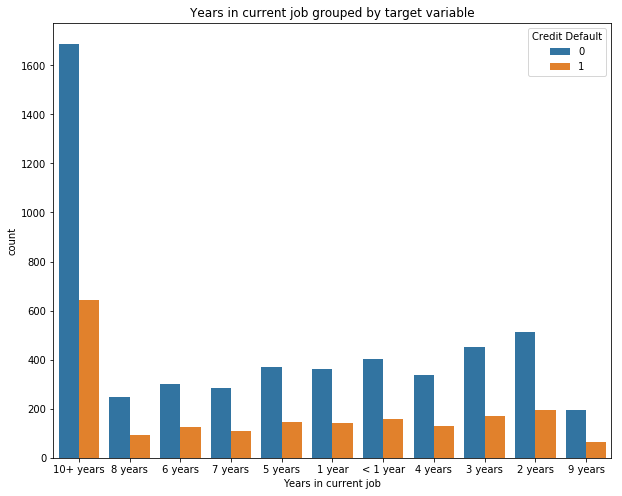

In [102]:
plt.figure(figsize=(10, 8))

sns.countplot(x="Years in current job", hue='Credit Default', data=df)
plt.title('Years in current job grouped by target variable')
plt.legend(title='Credit Default', loc='upper right')

plt.show()

Переменная 'Years in current job' содержит объектные данные. Для начала эту переменную нужно преобразовать в 11 других (dummies) переменных, и потом заменять отсутствующие значения.

In [103]:
dumm=pd.get_dummies(df['Years in current job'])

In [104]:
df.loc[:, 'Years in current job<1']=dumm['< 1 year']
df.loc[:, 'Years in current job=1']=dumm['1 year']
df.loc[:, 'Years in current job=2']=dumm['2 years']
df.loc[:, 'Years in current job=3']=dumm['3 years']
df.loc[:, 'Years in current job=4']=dumm['4 years']
df.loc[:, 'Years in current job=5']=dumm['5 years']
df.loc[:, 'Years in current job=6']=dumm['6 years']
df.loc[:, 'Years in current job=7']=dumm['7 years']
df.loc[:, 'Years in current job=8']=dumm['8 years']
df.loc[:, 'Years in current job=9']=dumm['9 years']
df.loc[:, 'Years in current job>=10']=dumm['10+ years']
df = df.drop(['Years in current job'], axis=1)
df.head()

,Home Ownership,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,...,Years in current job=1,Years in current job=2,Years in current job=3,Years in current job=4,Years in current job=5,Years in current job=6,Years in current job=7,Years in current job=8,Years in current job=9,Years in current job>=10
0,Own Home,482087.0,0.0,11.0,26.3,685960.0,1.0,34.6926,1.0,debt consolidation,...,0,0,0,0,0,0,0,0,0,0
1,Own Home,1025487.0,0.0,15.0,15.3,1181730.0,0.0,34.6926,0.0,debt consolidation,...,0,0,0,0,0,0,0,0,0,1
2,Home Mortgage,751412.0,0.0,11.0,35.0,1182434.0,0.0,34.6926,0.0,debt consolidation,...,0,0,0,0,0,0,0,1,0,0
3,Own Home,805068.0,0.0,8.0,22.5,147400.0,1.0,34.6926,1.0,debt consolidation,...,0,0,0,0,0,1,0,0,0,0
4,Rent,776264.0,0.0,13.0,13.6,385836.0,1.0,34.6926,0.0,debt consolidation,...,0,0,0,0,0,0,0,1,0,0


In [105]:
df['Years in current job<1'].fillna(df['Years in current job<1'].mean(), inplace=True)
df['Years in current job=1'].fillna(df['Years in current job=1'].mean(), inplace=True)
df['Years in current job=2'].fillna(df['Years in current job=2'].mean(), inplace=True)
df['Years in current job=3'].fillna(df['Years in current job=3'].mean(), inplace=True)
df['Years in current job=4'].fillna(df['Years in current job=4'].mean(), inplace=True)
df['Years in current job=5'].fillna(df['Years in current job=5'].mean(), inplace=True)
df['Years in current job=6'].fillna(df['Years in current job=6'].mean(), inplace=True)
df['Years in current job=7'].fillna(df['Years in current job=7'].mean(), inplace=True)
df['Years in current job=8'].fillna(df['Years in current job=8'].mean(), inplace=True)
df['Years in current job=9'].fillna(df['Years in current job=9'].mean(), inplace=True)
df['Years in current job>=10'].fillna(df['Years in current job>=10'].mean(), inplace=True)

Переменная "Home Ownership" также категориальная, значит, нужно ее преобразовать в dummy переменные:

In [106]:
dumm2 = pd.get_dummies(df['Home Ownership'])
dumm2.head()

,Home Mortgage,Own Home,Rent
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,0,1


In [107]:
df.loc[:, 'Home Mortgage']=dumm2['Home Mortgage']
df.loc[:, 'Own Home']=dumm2['Own Home']
df.loc[:, 'Rent']=dumm2['Rent']
df = df.drop(['Home Ownership'], axis=1)
df.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,...,Years in current job=4,Years in current job=5,Years in current job=6,Years in current job=7,Years in current job=8,Years in current job=9,Years in current job>=10,Home Mortgage,Own Home,Rent
0,482087.0,0.0,11.0,26.3,685960.0,1.0,34.6926,1.0,debt consolidation,Short Term,...,0,0,0,0,0,0,0,0,1,0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,34.6926,0.0,debt consolidation,Long Term,...,0,0,0,0,0,0,1,0,1,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,34.6926,0.0,debt consolidation,Short Term,...,0,0,0,0,1,0,0,1,0,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,34.6926,1.0,debt consolidation,Short Term,...,0,0,1,0,0,0,0,0,1,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,34.6926,0.0,debt consolidation,Short Term,...,0,0,0,0,1,0,0,0,0,1


Посмотрим на переменную Purpose:

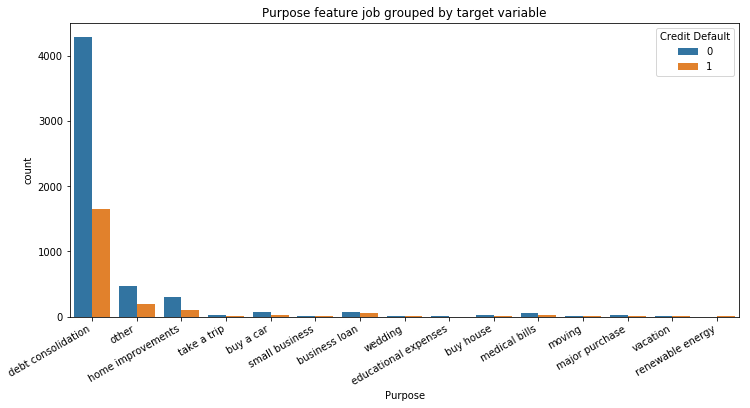

In [108]:
fig = plt.figure(figsize=(12, 6))

sns.countplot(x="Purpose", hue='Credit Default', data=df)
plt.title('Purpose feature job grouped by target variable')
plt.legend(title='Credit Default', loc='upper right')
fig.autofmt_xdate() #автоматически вращает текст оси x

plt.show()

Здесь видим 2 четких выброса (всего 2 и 8 значений, соответственно, как видели выше в изучении категориальных данных): кредиты взятые с целью renewable energy и vacation. Заменим их на моды по остальным признакам:

In [109]:
df.loc[df['Purpose']=='renewable energy', 'Purpose']=df['Purpose'].mode()
df.loc[df['Purpose']=='vacation', 'Purpose']=df['Purpose'].mode()

In [110]:
df['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
Name: Purpose, dtype: int64

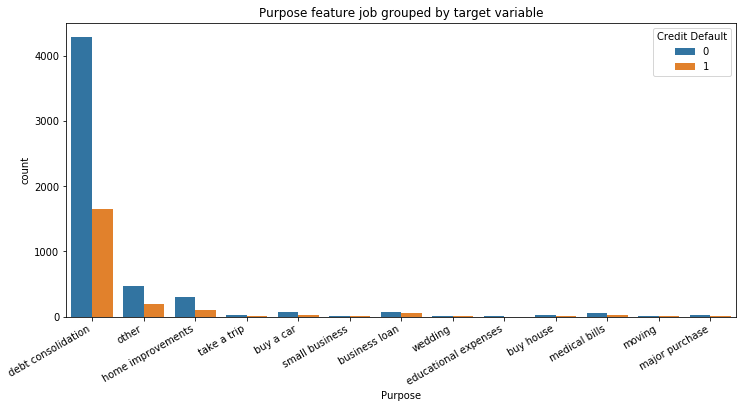

In [111]:
fig = plt.figure(figsize=(12, 6))

sns.countplot(x="Purpose", hue='Credit Default', data=df)
plt.title('Purpose feature job grouped by target variable')
plt.legend(title='Credit Default', loc='upper right')
fig.autofmt_xdate() #автоматически вращает текст оси x

plt.show()

Превратим эту переменную в dummy признаки:

In [112]:
dumm3=pd.get_dummies(df['Purpose'])
dumm3.head()

,business loan,buy a car,buy house,debt consolidation,educational expenses,home improvements,major purchase,medical bills,moving,other,small business,take a trip,wedding
0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


In [117]:
df2 = pd.concat([df, dumm3], axis=1, join='inner')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 42 columns):
Annual Income                   7500 non-null float64
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    7500 non-null float64
Bankruptcies                    7500 non-null float64
Purpose                         7490 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    7500 non-null float64
Credit Default                  7500 non-null int64
Years in current job<1          7500 non-null uint8
Years in current job=1          750

In [114]:
colnames = dumm3.columns
colnames

Index(['business loan', 'buy a car', 'buy house', 'debt consolidation',
       'educational expenses', 'home improvements', 'major purchase',
       'medical bills', 'moving', 'other', 'small business', 'take a trip',
       'wedding'],
      dtype='object')

In [120]:
strn = 'Purpose: '
for name in colnames:
    n2 = name
    newn = strn + n2
    #print(newn)
    df2.rename(columns={name: newn}, inplace=True)
    
df2.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Purpose', 'Term', 'Current Loan Amount',
       'Current Credit Balance', 'Monthly Debt', 'Credit Score',
       'Credit Default', 'Years in current job<1', 'Years in current job=1',
       'Years in current job=2', 'Years in current job=3',
       'Years in current job=4', 'Years in current job=5',
       'Years in current job=6', 'Years in current job=7',
       'Years in current job=8', 'Years in current job=9',
       'Years in current job>=10', 'Home Mortgage', 'Own Home', 'Rent',
       'Purpose: business loan', 'Purpose: buy a car', 'Purpose: buy house',
       'Purpose: debt consolidation', 'Purpose: educational expenses',
       'Purpose: home improvements', 'Purpose: major purchase',
       'Purpose: medical bills', 'Purpose: moving', 'Purpose: other',
       'Purpos

In [121]:
df2 = df2.drop(['Purpose'], axis=1)

Посмотрим на целевую переменную "Credit Default"

In [127]:
df2['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

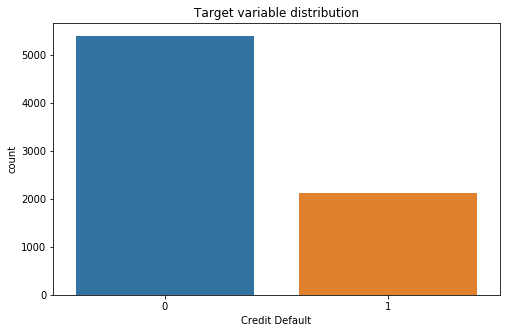

In [128]:
plt.figure(figsize=(8, 5))

sns.countplot(x='Credit Default', data=df2)

plt.title('Target variable distribution')
plt.show()

Видим, что около 1/3 от общего числа клиентов не расплатились с банком.

Разделим целевую переменную и остальные признаки:

In [129]:
target = df2['Credit Default']
features = df2.drop(['Credit Default'], axis=1)
features.head()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Term,Current Loan Amount,...,Purpose: debt consolidation,Purpose: educational expenses,Purpose: home improvements,Purpose: major purchase,Purpose: medical bills,Purpose: moving,Purpose: other,Purpose: small business,Purpose: take a trip,Purpose: wedding
0,482087.0,0.0,11.0,26.3,685960.0,1.0,34.6926,1.0,Short Term,99999999.0,...,1,0,0,0,0,0,0,0,0,0
1,1025487.0,0.0,15.0,15.3,1181730.0,0.0,34.6926,0.0,Long Term,264968.0,...,1,0,0,0,0,0,0,0,0,0
2,751412.0,0.0,11.0,35.0,1182434.0,0.0,34.6926,0.0,Short Term,99999999.0,...,1,0,0,0,0,0,0,0,0,0
3,805068.0,0.0,8.0,22.5,147400.0,1.0,34.6926,1.0,Short Term,121396.0,...,1,0,0,0,0,0,0,0,0,0
4,776264.0,0.0,13.0,13.6,385836.0,1.0,34.6926,0.0,Short Term,125840.0,...,1,0,0,0,0,0,0,0,0,0


Посмотрим на взаимосвязь признаков и целевой переменной:

In [130]:
cols = list(df2.columns.values)
cols

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score',
 'Credit Default',
 'Years in current job<1',
 'Years in current job=1',
 'Years in current job=2',
 'Years in current job=3',
 'Years in current job=4',
 'Years in current job=5',
 'Years in current job=6',
 'Years in current job=7',
 'Years in current job=8',
 'Years in current job=9',
 'Years in current job>=10',
 'Home Mortgage',
 'Own Home',
 'Rent',
 'Purpose: business loan',
 'Purpose: buy a car',
 'Purpose: buy house',
 'Purpose: debt consolidation',
 'Purpose: educational expenses',
 'Purpose: home improvements',
 'Purpose: major purchase',
 'Purpose: medical bills',
 'Purpose: moving',
 'Purpose: other',
 'Purpose: small business',
 'Purpose: take a trip',
 'Purpose: wedding']

In [131]:
new_cols = ['Annual Income', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit',
 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Term', 'Current Loan Amount', 'Current Credit Balance',
 'Monthly Debt', 'Credit Score', 'Years in current job<1', 'Years in current job=1', 'Years in current job=2',
 'Years in current job=3', 'Years in current job=4', 'Years in current job=5', 'Years in current job=6', 'Years in current job=7',
 'Years in current job=8', 'Years in current job=9', 'Years in current job>=10', 'Home Mortgage', 'Own Home',
 'Rent', 'Purpose: business loan', 'Purpose: buy a car', 'Purpose: buy house', 'Purpose: debt consolidation',
 'Purpose: educational expenses', 'Purpose: home improvements', 'Purpose: major purchase', 'Purpose: medical bills', 'Purpose: moving',
 'Purpose: other', 'Purpose: small business', 'Purpose: take a trip', 'Purpose: wedding', 'Credit Default']
df2 = df2[new_cols]
df2.columns

Index(['Annual Income', 'Tax Liens', 'Number of Open Accounts',
       'Years of Credit History', 'Maximum Open Credit',
       'Number of Credit Problems', 'Months since last delinquent',
       'Bankruptcies', 'Term', 'Current Loan Amount', 'Current Credit Balance',
       'Monthly Debt', 'Credit Score', 'Years in current job<1',
       'Years in current job=1', 'Years in current job=2',
       'Years in current job=3', 'Years in current job=4',
       'Years in current job=5', 'Years in current job=6',
       'Years in current job=7', 'Years in current job=8',
       'Years in current job=9', 'Years in current job>=10', 'Home Mortgage',
       'Own Home', 'Rent', 'Purpose: business loan', 'Purpose: buy a car',
       'Purpose: buy house', 'Purpose: debt consolidation',
       'Purpose: educational expenses', 'Purpose: home improvements',
       'Purpose: major purchase', 'Purpose: medical bills', 'Purpose: moving',
       'Purpose: other', 'Purpose: small business', 'Purpose: take a

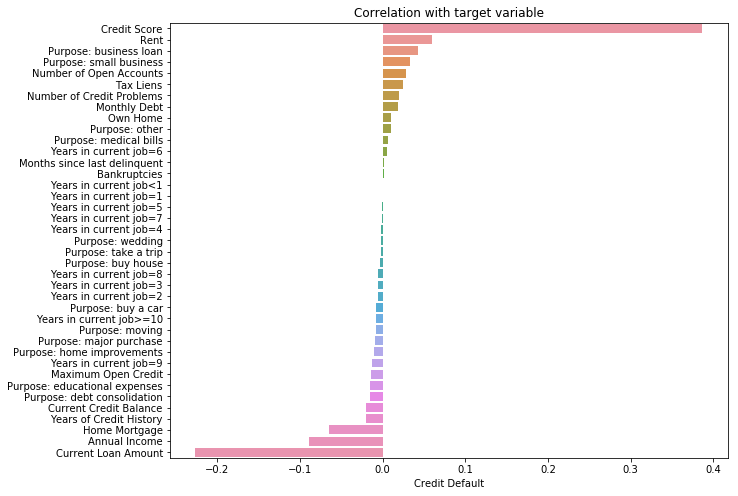

In [132]:
corrT= df2.corr().iloc[:-1, -1].sort_values(ascending=False)
plt.figure(figsize=(10, 8))

sns.barplot(x=corrT, y=corrT.index)

plt.title('Correlation with target variable')
plt.show()

Так как нас интересует полная выплата кредита, то будем считать за положительную переменную credit default = 0, а за отрицательную (невыплата кредита) - credit default = 1. Исходя из значений корреляции, посчитанной выше, видим, что с целевой переменной положительно взаимосвязана текущая сумма кредита (вероятно, чем меньше оставшая ся сумма, тем больше вероятность, что кредит будет выплачен до конца?), ежемесячный доход, ипотека на дом. Далее, корреляция целевой пееменной с признаками идет на спад. 

Интересно, что, практически, не влияют на целевую переменную 2 признака - количество лет на текущей работе = 1 и < 1. Возможно, в данном случае, данных с таким сроком работы слишком мало для оказания какого бы то ни было эффекта? 

Еще один любопытный факт относится к отрицательному влиянию кредитного скоринга и наличия аренды жилья. Любопытно, что и наличие собственного дома также отрицательно коррелирует с возможностью кредитного дефолта, хотя и на малый процент. То есть, в целом, человек с ипотекой на жилье имеет больше веса по выплате кредита, чем человек, уже имеющий свой дом. Странно.

Любопытные закономерности прослеживаются и по части целей, с которыми были взяты кредиты. Так, бизнес-кредиты и кредиты, взятые под малый бизнес имеют небольшую кореляцию с вероятностью не выплатить деньги банку, в то время как кредиты на выплату долгов и оплату образованию имеют кореляциюнную зависимость с успешной выплатой кредита.

Посмотрим, как распределена переменная Credit Score

In [133]:
df["Credit Score"].value_counts()

1151.087498    1557
740.000000      169
747.000000      168
748.000000      157
745.000000      152
742.000000      151
741.000000      151
743.000000      148
746.000000      145
739.000000      144
738.000000      137
744.000000      135
737.000000      134
732.000000      124
736.000000      113
734.000000      112
733.000000      101
728.000000      100
730.000000       98
735.000000       96
750.000000       94
731.000000       94
729.000000       87
725.000000       86
721.000000       86
723.000000       82
727.000000       80
722.000000       76
720.000000       75
724.000000       74
               ... 
588.000000        1
6410.000000       1
6610.000000       1
6270.000000       1
6910.000000       1
6790.000000       1
591.000000        1
6480.000000       1
610.000000        1
6570.000000       1
6880.000000       1
6770.000000       1
630.000000        1
6830.000000       1
599.000000        1
607.000000        1
6490.000000       1
6160.000000       1
6820.000000       1


Интересно, что эта переменная - вещественная, но тип у нее int66 и, плюс ко всему, она содержит аж 1557 одинаковых значений.

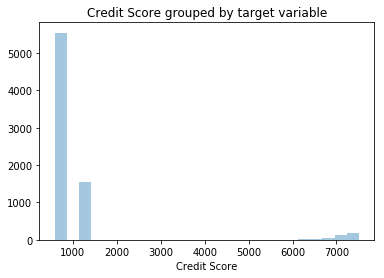

In [135]:
plt.figure(figsize=(6, 4))

sns.distplot(df["Credit Score"], kde=False, rug=False, bins=25)
plt.title('Credit Score grouped by target variable')
#plt.legend(title='Credit Default', loc='upper right')

plt.show()

На гистограмме видим, что значения распределились на 3 группы: до 1000, до 1500 и в районе 6500 - 7500 тысяч. Вторая группа, вероятно, та самая, которая содержит 1557 одинаковых значений. Может быть, имеет смысл разделить эти значения по категориям?

Посмотрим на переменную Rent:

In [136]:
df['Rent'].value_counts()

0    4296
1    3204
Name: Rent, dtype: int64